## Compare BioTac data of everyday touch interactions against actuator feedback

<b>Setup</b>: 
1. BioTac mounted to finger via 3D printed shell
2. Use a camera on the side to record the touch interaction with the BioTac finger
3. Force: BioTac DC pressure ~ 5kPa
4. Contact orientation: The "fingerpad" of BioTac should facing directly the touched object, ideally with the center of the BioTac be the first contact point
<img src="BioTacTouchAreaReference.png">

<b>[Totle time] Touch Interactions to be Measured (with each repeated 12 times over 1 minute, with ~2 seconds interval)</b>:

<h4> Pressing and touching </h4>

1. [1 min] Wear the BioTac to lightly tap on a keyboard, with very light force just enough to press down a key, and with movement as natural as possible (Maybe type "max planck"?)

2. [1 min] Press one BioTac on the forearm of the resting arm

3. [1 min] Use the center of BioTac to touch a human fingertip

4. [1 min] Use the center of BioTac to touch a round end of a pen

5. [1 min] Use the center of BioTac to touch the corner of a pile of fabric

<h4> Pinch grasp </h4>

6. [1 min] With one BioTac bonded to the index finger (if possible, bond another one to the thumb), then pinch grasp and lift a pen from a table, with force just enought to lift the pen, and as natural as possible, and then drop it back.

7. [1 min] With the same BioTac setup, pinch grasp and lift a small fruit or other ball-shaped objects (diameter < 5 cm, grape/berry) from the table.

8. [1 min] With the same BioTac setup, pinch grasp the finger

<b>Touch Interactions used in VR demos</b>: Touch animal, body tissue, clothes, keypad, grape/bubble
<img src="VRTouchInteractionReference.png">


<h4> All touch interactions include 12 repetitions, with roughly 2 second interval and 1 second action time </h4>

<h4> Wearing BioTac BA on index finger, move only index finger, avoid moving forearm or wrist if possible </h4>

<h4> If possible, contact the object with the center-back region of the fingerpad </h4>

1. Press on a soft keyboard of a laptop.
2. Gentally press on a soft skin
3. Touch a hinging fabric
4. Pinch grasp a soft object with weight similar to a kiwi 

In [1]:
'''
Visualize all results of pressure and impedance measurement of BioTac for producing Figure 3
Author: Yitian Shao
Created on 2023.03.08
'''

from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Arc
import pandas as pd
from scipy import signal
from scipy.interpolate import griddata
import seaborn as sns

from PyBiotacLib import *

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf')

plt.rc('font', size=10, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'"
plt.rc('axes', edgecolor='0.5', linewidth=0.75)
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams.update({'errorbar.capsize': 4})
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['errorbar.capsize'] = 4
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
    
figSize_inch = (3.2, 2.4)

actuatorColor = 'k' # actuatorColor = 'dimgrey' # actuatorColor = 'olive'

In [2]:
# gestureLabels = ['index-alona-keyboard','index-alona-floating-sweater-pinch', 'index-alona-floating-sweater-push',
#                  'index-alona-kiwi-lift-2nd','index-alona-palpation','index-alona-tomato-lift']

measureDataPath = ".\Data0425"
fileName = 'index-alona-keyboard.btd.csv' 
# btData = loadRawBioTac(measureDataPath, fileName)
# fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(8062, 8130, 8), btData, 0, unifyRange="Symmetric", yRange=[-0.85, 0.85], color=actuatorColor);
# fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
# fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

Raw data range = [-37.00, 24.00]


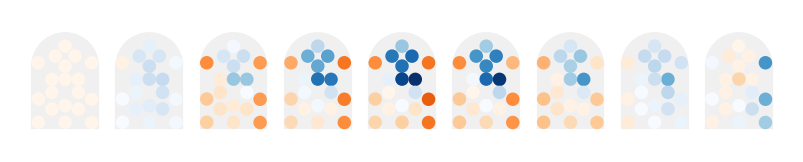

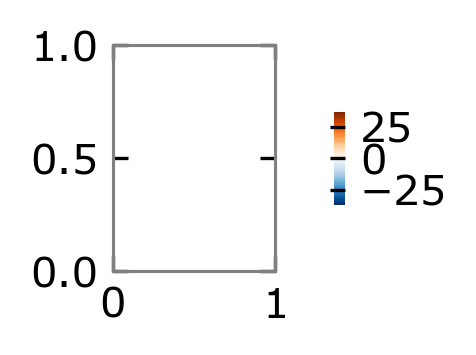

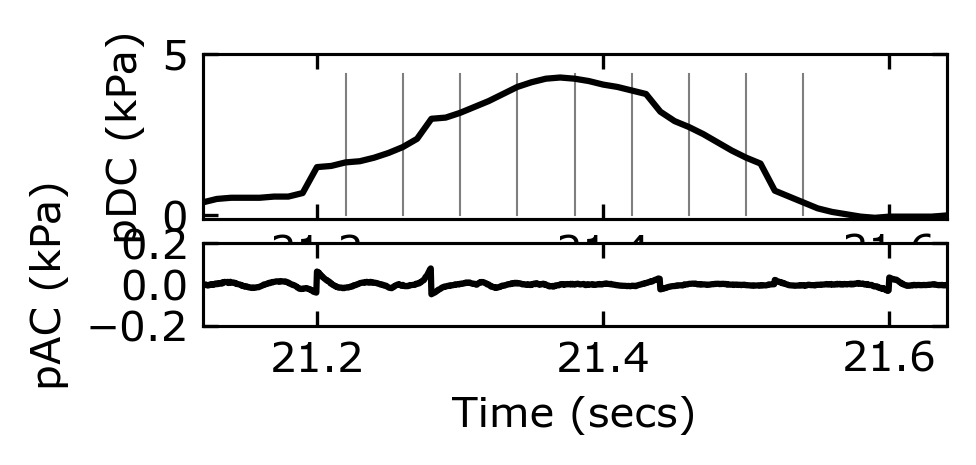

In [3]:
measureDataPath = ".\Data0425"
fileName = 'index-alona-floating-sweater-pinch.btd.csv' 
btData = loadRawBioTac(measureDataPath, fileName)
fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(2122, 2158, 4), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);

ax2[1].set_ylim([-0.2, 0.2])

fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

Raw data range = [-313.00, 186.00]


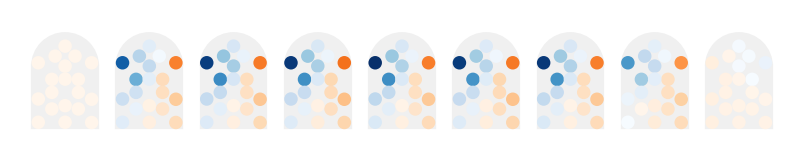

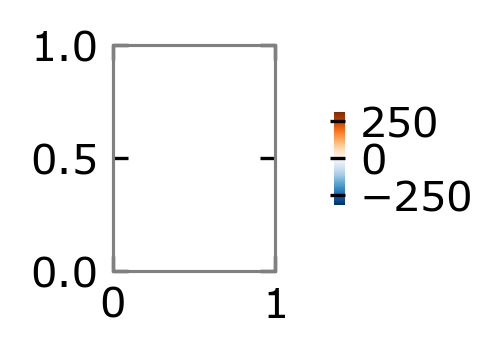

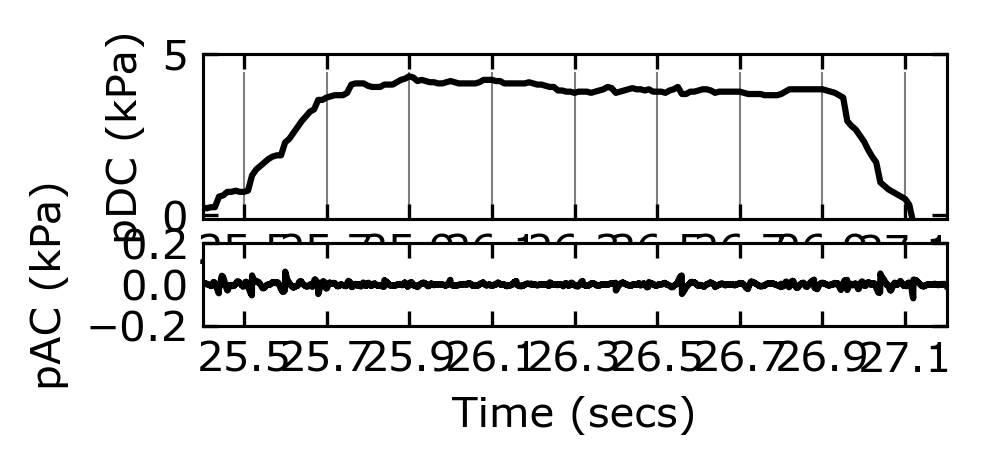

In [4]:
measureDataPath = ".\Data0425"
fileName = 'index-alona-kiwi-lift-2nd.btd.csv' 
btData = loadRawBioTac(measureDataPath, fileName)
fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(2550, 2715, 20), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);

ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]) + 25.5
ax2[0].set_xticks(ticks)
ax2[1].set_xticks(ticks)

ax2[1].set_ylim([-0.2, 0.2])

fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

Raw data range = [-14.00, 43.00]


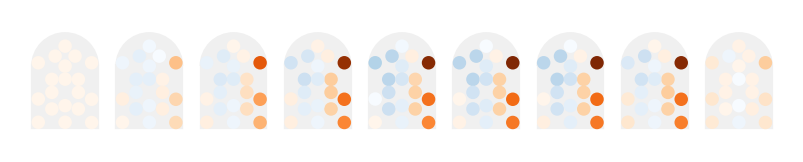

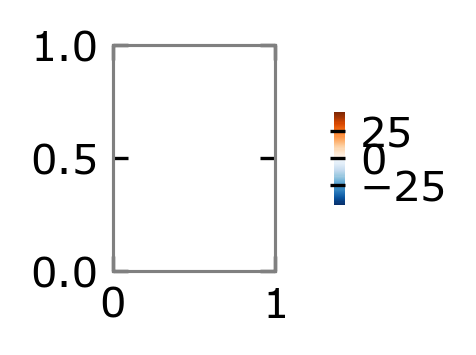

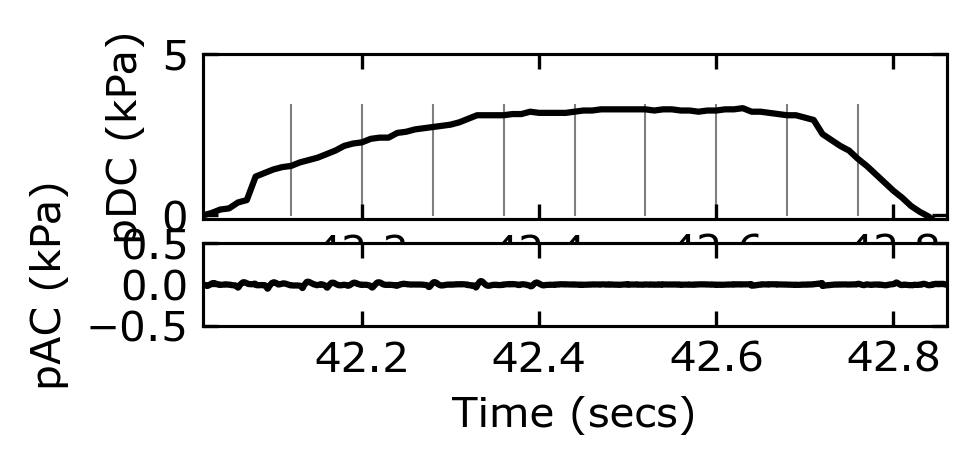

In [190]:
# ''' SI Figure to compare haptic feedback vs. natural touch (2023.11.07) '''
'''['15-gentle-skin-touch','15-2nd-thumb-pinch','index-alona-floating-sweater-pinch','index-alona-floating-sweater-push',
'index-alona-kiwi-lift-2nd',]'''

measureDataPath = ".\Data0425"

# ''' SI Figure - Arm Press '''
fileName = '15-gentle-skin-touch.btd.csv'
btData = loadRawBioTac(measureDataPath, fileName)
fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(4212, 4280, 8), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);
fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

# ''' SI Figure - Thumb Pinch '''
fileName = '15-2nd-thumb-pinch.btd.csv'
btData = loadRawBioTac(measureDataPath, fileName)
fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(1956, 2024, 8), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);
fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

# ''' SI Figure - Cloth Push '''
fileName = 'index-alona-floating-sweater-push.btd.csv'
btData = loadRawBioTac(measureDataPath, fileName)
fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(2185, 2250, 8), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);
fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

################################################################################################################################
###### measureDataPath = ".\Data0425"
###### fileName = 'index-alona-palpation.btd.csv' 
###### btData = loadRawBioTac(measureDataPath, fileName)
###### fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(np.arange(2449, 2525, 9), btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);

In [ ]:
''' Haptic feedback from the ultra-thin chamber '''
''' Visualize real data and Biotac electrode impedance map: Charge time = 0.1, 0.4, 1.2, 1.6 secs '''
def plotCtrlSignal(ax, tOn=100, tMargin=100, tShift=0):
    segLen = 1800
    y = np.zeros((segLen,1))
    y[tMargin:tMargin+tOn] = 1
    x = np.arange(segLen)
    ax.plot((x + tShift - tMargin)/1000, y, 'tab:grey')
    
measureDataPath = ".\Data2022.06.26"
root = 'Act60mm1.5mL'; 

'''---------------------------------------------------- 1.6 sec ----------------------------------------------------'''
''' To plot all waveforms in one axis '''
Act60v100c1600 = {}
# Act60v100c1600['tind'] = np.arange(687, 880, 22)
Act60v100c1600['tind'] = np.arange(1817, 2010, 22)

fileName = 'v100c1600d4000t1' 
btData = loadDataSegment(measureDataPath, root, fileName+'.btd.csv', lpFreq=0)

# btData['t'] = btData['t'] - 6.87
btData['t'] = btData['t'] - 18.17
btData['t2'] = btData['t2'] - 18.17
Act60v100c1600['t'] = btData['t']
Act60v100c1600['pDC'] = btData['pDC']

fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(Act60v100c1600['tind'], btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);
plotCtrlSignal(ax2[0], tOn=1600, tShift=0)

ax2[0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8])
ax2[1].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8])

ax2[1].set_ylim([-0.2, 0.2])

fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

'''---------------------------------------------------- 0.4 sec ----------------------------------------------------'''
''' To plot all waveforms in one axis '''
Act60v100c400 = {}
Act60v100c400['tind'] = np.arange(569,630, 7)

fileName = 'v100c400d4000t1' 
btData = loadDataSegment(measureDataPath, root, fileName+'.btd.csv', lpFreq=0)

btData['t'] = btData['t'] - 5.70
btData['t2'] = btData['t2'] - 5.70
Act60v100c400['t'] = btData['t']
Act60v100c400['pDC'] = btData['pDC']

fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(Act60v100c400['tind'], btData, 0, unifyRange="Symmetric", yRange=[-0.5, 0.5], color=actuatorColor);
plotCtrlSignal(ax2[0], tOn=400, tShift=0)

ax2[1].set_ylim([-0.2, 0.2])

fig1.savefig("%s_map.pdf" % fileName, bbox_inches='tight')
fig2.savefig("%s_waveform.pdf" % fileName, bbox_inches='tight')

fig1cbar.savefig("%s_colorbar.pdf" % fileName, bbox_inches='tight')

<hr>

## Stats of pressure measurement

In [ ]:
'''
Load, preprocess and segment BioTac data

Ref: https://syntouchinc.com/wp-content/uploads/2020/09/SynTouch-Product-Manual-BioTac-2020-09-23.pdf
'''

measureDataPath = ".\Data2022.06.26"

DCpressure = []
ACpressure = []

''' Data preprocess and segmentation '''
for root, directories, files in walk(measureDataPath):
    for fileName in files:
        actLabel = decodeActuatorInfo(root)
        
        if actLabel:
            tubeLen = decodeData(actLabel, '\d+', rearCode='mm')
            infillVol = decodeData(actLabel, '[\d+\.]*\d+', rearCode='mL')   
        
        dataType = decodeDataType(fileName)  
        
        if dataType:
            vLevel = decodeData(fileName, '\d+', frontCode='v')
            cTime = decodeData(fileName, '\d+', frontCode='c')
            dTime = decodeData(fileName, '\d+', frontCode='d')
            trialNum = decodeData(fileName, '\d+', frontCode='t')
        
#             print("Len=%d, Infill=%.2f, Condi: %s v=%d c=%d d=%d t=%d" % 
#                   (tubeLen, infillVol, dataType, vLevel, cTime, dTime, trialNum))         
            dLabel = "L%03dF%.1fV%03dC%04dD%04d" % (tubeLen, infillVol, vLevel, cTime, dTime)
    
            ''' Read in data '''
            data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
            Fs = biotacFs[dataType]
            
            inactiveValue = np.mean(np.concatenate((data[:int(0.2*Fs),1], data[-int(2*Fs):,1])))
            
            ''' Unit conversion process suggested by BioTac manual '''
            data[:,1] = data[:,1] - inactiveValue # Remove DC offset
            data[:,1] = data[:,1] * biotacUnit[dataType] # Convert from bit to physical unit (kPa)
            
            if dataType == 'Pdc':
                cutInd = cutRepeatTrial(data, Fs, expectedTrialNum=6, disp=False)

                DCpressure.append([dLabel, tubeLen, infillVol, dataType, vLevel, cTime, dTime, 
                                   trialNum, data, cutInd])
            elif dataType == 'Pac':
                ACpressure.append([dLabel, tubeLen, infillVol, dataType, vLevel, cTime, dTime, 
                                   trialNum, data])
                
DCpressure = pd.DataFrame(DCpressure, columns = ['Label', 'TubeLength_mm','Infill_mL','DType',
                 'Voltage','ChargeTime_ms','DischargeTime_ms','Trial','Data','CutIndex'])  
ACpressure = pd.DataFrame(ACpressure, columns = ['Label', 'TubeLength_mm','Infill_mL','DType',
                 'Voltage','ChargeTime_ms','DischargeTime_ms','Trial','Data']) 

DCpressure.head(10);



'''
Data restructure (grouping segmented measurements) for analysis and visualization
'''

dictData = {} # Use dictionary to avoid dataframe concatenation errors

for i in DCpressure.index:
    dLabel = DCpressure.loc[i, 'Label']
    dcData = DCpressure.loc[i, 'Data']
    cutIndDC = DCpressure.loc[i, 'CutIndex']
    
    ind = ((ACpressure['Label'] == DCpressure.loc[i, 'Label']) & 
        (ACpressure['Trial'] == DCpressure.loc[i, 'Trial']))   
    acData = ACpressure.loc[ind, 'Data'].values[0]
    
    segNum = len(cutIndDC)
    if segNum: # When data can be segmented
        cutIndAC = cutIndDC * int(biotacFs['Pac'] / biotacFs['Pdc']) # Adjust cut index considering difference in sampling frequency
    
        if dLabel not in dictData: # Initialization for a new label
            dictData[dLabel] = DCpressure.loc[i, ['Label', 'TubeLength_mm','Infill_mL',
                     'Voltage','ChargeTime_ms','DischargeTime_ms']]
        
        if 'Pdc' not in dictData[dLabel]: # Initialization for a new column of current label
            dictData[dLabel]['Pdc'] = []
            
        if 'Pac' not in dictData[dLabel]: # Initialization for a new column of current label
            dictData[dLabel]['Pac'] = []
        
        for j in range(segNum):
            if j < segNum-1:
                segDC = dcData[cutIndDC[j]:cutIndDC[j+1],:]
                segAC = acData[cutIndAC[j]:cutIndAC[j+1],:]
            else:
                segDC = dcData[cutIndDC[j]:,:]
                segAC = acData[cutIndAC[j]:,:]

            dictData[dLabel]['Pdc'].append(segDC)  
            dictData[dLabel]['Pac'].append(segAC) 
            
#             yyAxisPlot(segDC[:,0], segDC[:,1], segAC[:,0], segAC[:,1], 
#                        xText=("%s  Time (s)" % dLabel), 
#                        y0Text='DC pressure (kPa)', y1Text='AC pressure (kPa)')
#             plt.show();
    else:
        print("[Warining] Data cannot be segmented: %s" % dLabel)
        
        
''' Convert the disctionary to a dataframe '''
allData = None

for dLabel in dictData:
    aFrame = dictData[dLabel].to_frame().T   
    
    if allData is None:
        allData = aFrame
    else:
        allData = pd.concat([allData, aFrame], axis=0)
    
display(allData)    

In [ ]:
'''Feature extraction from signals: peak value, time-averaged value, rising time'''

column_peakDC = []
column_tavgDC = []
column_triseDC = []
column_tDuration = []
column_riseMark = []

for _, aRow in allData.iterrows():
    print(aRow['Label'])
#     print(\"Len=%d, Infill=%.2f, Condi: v=%d c=%d d=%d\" % (aRow['TubeLength_mm'], aRow['Infill_mL'], aRow['Voltage'],
#                    aRow['ChargeTime_ms'], aRow['DischargeTime_ms'])) 
    peakDC = []
    tavgDC = []
    triseDC = []
    tDuration = []
    riseMark = []
    
    for aSignal in aRow['Pdc']:
        smData = lowpassSmooth(aSignal[:,1])
        smData = signal.detrend(smData, type='linear')
   
        maxValue = np.max(smData)
        onsetInd = np.argwhere(smData[50:] > 0.20 * maxValue)[0][0]+50 # When signal reach 10% of its peak (onset)
        
        PP80Ind = np.argwhere(smData[50:] > 0.80 * maxValue)[0][0]+50 # When signal reach 90% of its peak
       
        peakInd = np.argmax(smData) #################### To be investigated ?smData/aSignal[:,1]
        peakValue = np.max(aSignal[:,1])
  
        riseTime = aSignal[PP80Ind,0] - aSignal[onsetInd,0]
    
#         tavgValue = np.mean(aSignal[onsetInd:peakInd,1])
        tavgValue = np.mean(aSignal[onsetInd:PP80Ind,1])
    
        leftInd, rightInd = getDuration(smData, peakInd, maxValue*0.2)
        
        peakDC.append(peakValue)
        tavgDC.append(tavgValue)
        triseDC.append(riseTime)
        
        tDuration.append((rightInd - leftInd) / biotacFs['Pdc'])
        riseMark.append([onsetInd, PP80Ind])

#         ax1,_ = aPlot()
#         ax1.plot(aSignal[:,0], aSignal[:,1], 'k')        #         ax1.plot(aSignal[:,0], smData, 'g')
#         ax1.plot([aSignal[leftInd,0], aSignal[leftInd,0]], [0, maxValue], '-r')
#         ax1.plot([aSignal[rightInd,0], aSignal[rightInd,0]], [0, maxValue], '-r')
#         ax1.set_xlabel("peak=%.1fkPa - tAvg=%.1fkPa - riseT=%.3fs" % (peakValue,tavgValue,riseTime))
#         plt.show()
    
    column_peakDC.append(peakDC)
    column_tavgDC.append(tavgDC)
    column_triseDC.append(triseDC)
    column_tDuration.append(tDuration)
    column_riseMark.append(riseMark)
    
allData['PeakPdc'] = column_peakDC
allData['AvgPdc'] = column_tavgDC
allData['TrisePdc'] = column_triseDC
allData['TDuration'] = column_tDuration
allData['RiseMark'] = column_riseMark

display(allData)

In [9]:
'''
Functions for Visualizing the Errorbar

42 grid: vLevel = [2, 4, 8, 16, 32, 50, 100] * cTime = [100, 200, 400, 800, 1200, 1600]
'''
def computeErrorbar(dframe, xColName, xColList, yColName, yColList, zColName):
    dMean = []
    dSTD = []
    
    for x in xColList:
        dMean.append([])
        dSTD.append([])
        for y in yColList:
            selectInd = (dframe[xColName] == x) & (dframe[yColName] == y)

            compValue = getDataArray(dframe, selectInd, zColName, toFlat=True)  
            
            valueMean, valueSTD = getMeanSTD(compValue)
            
            dMean[-1].append(valueMean)
            dSTD[-1].append(valueSTD)
    
    dMean = np.array(dMean)
    dSTD = np.array(dSTD)
    
    return dMean, dSTD
 
def dispErrorbar(ax, x, dMean, dErr, xLabel, xLabelStr, yLabelStr, zLabel, colorPalette=None, style='.-', 
                 dispLegend=True, xShift=[0.1,0.4]):
    yLen = len(yLabelStr)
    
#     colors = cm.rainbow(np.linspace(0, 1, yLen))
    colors = sns.color_palette(colorPalette, n_colors=yLen)
    
    ax.set_ylabel(zLabel, color='k');

#     ax.violinplot(dMean, positions=x, showmeans=False, showmedians=False, showextrema=False)
    pltHandles = []
    for i in np.arange(yLen):
        pltHandles.append(ax.plot(2*x + (i * xShift[0]), dMean[i], style, c=colors[i])[0]);
        (ax.errorbar(2*x + (i * xShift[0]), dMean[i], yerr=dErr[i], fmt='none', ecolor=colors[i], capsize=0)[0]);
        #ecolor='tab:grey'
        
    ax.set_xlabel(xLabel);
    ax.set_xticklabels(xLabelStr, rotation=0);
    ax.set_xticks(2*x + xShift[1]);
    
    if dispLegend:
        ax.legend(handles=reversed(pltHandles), labels=reversed(yLabelStr), frameon=False, bbox_to_anchor=(1.02, 1.0), 
                  loc='upper left');
    
    return ax

15-gentle-skin-touch.btd.csv

-------- 15-gentle-skin-touch --------
x[25% - Median - 75%] 0.67, 0.72, 0.77

y[25% - Median - 75%] 2.70, 2.96, 3.29

15-2nd-thumb-pinch.btd.csv

-------- 15-2nd-thumb-pinch --------
x[25% - Median - 75%] 0.56, 0.61, 0.81

y[25% - Median - 75%] 2.62, 2.79, 2.91

index-alona-floating-sweater-pinch.btd.csv

-------- index-alona-floating-sweater-pinch --------
x[25% - Median - 75%] 0.31, 0.33, 0.36

y[25% - Median - 75%] 3.18, 3.94, 4.42

index-alona-floating-sweater-push.btd.csv

-------- index-alona-floating-sweater-push --------
x[25% - Median - 75%] 0.62, 0.69, 0.78

y[25% - Median - 75%] 0.55, 0.66, 0.77

index-alona-kiwi-lift-2nd.btd.csv

-------- index-alona-kiwi-lift-2nd --------
x[25% - Median - 75%] 1.54, 1.60, 1.64

y[25% - Median - 75%] 4.25, 4.76, 6.30



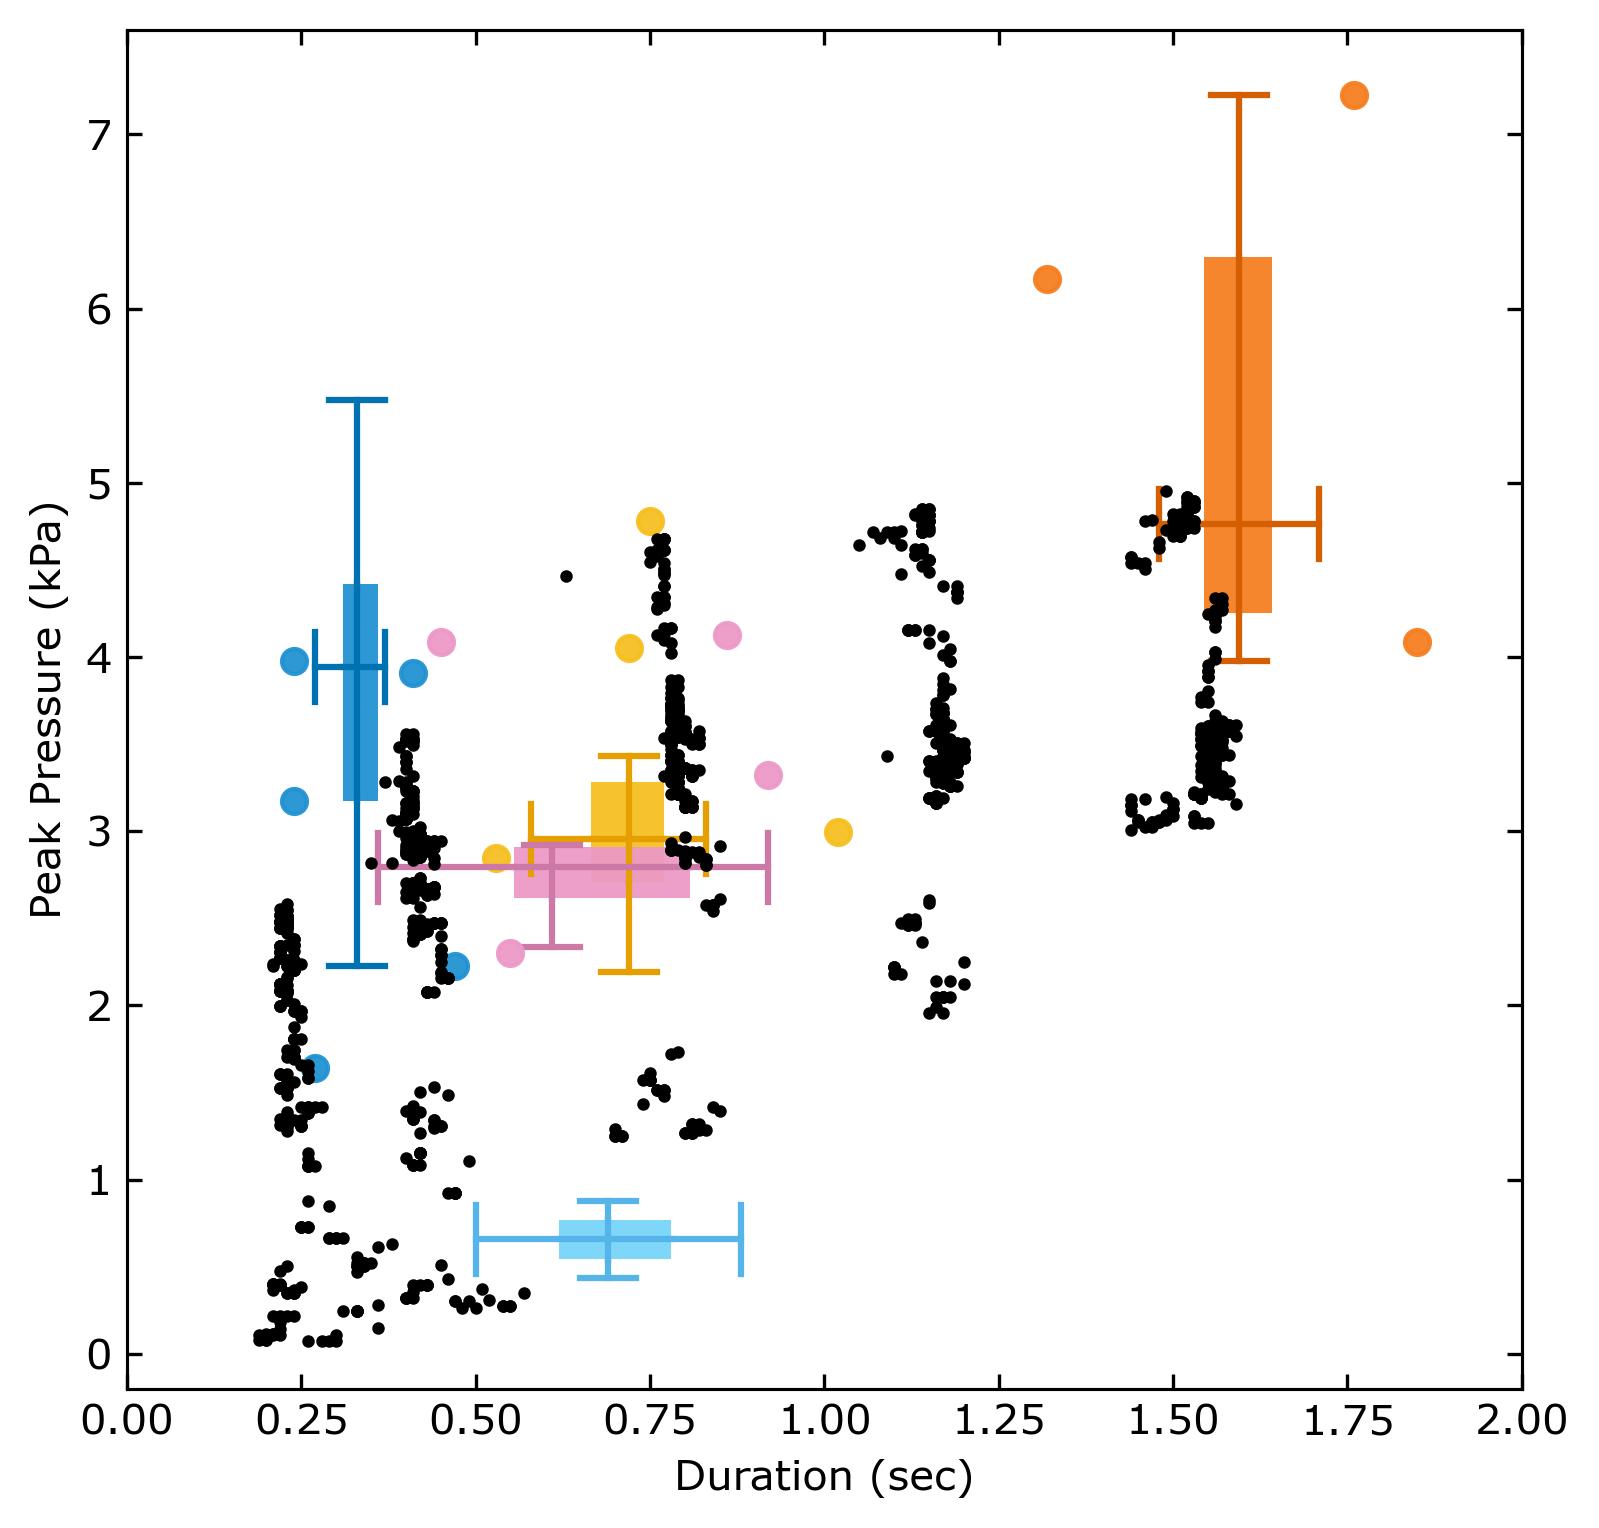

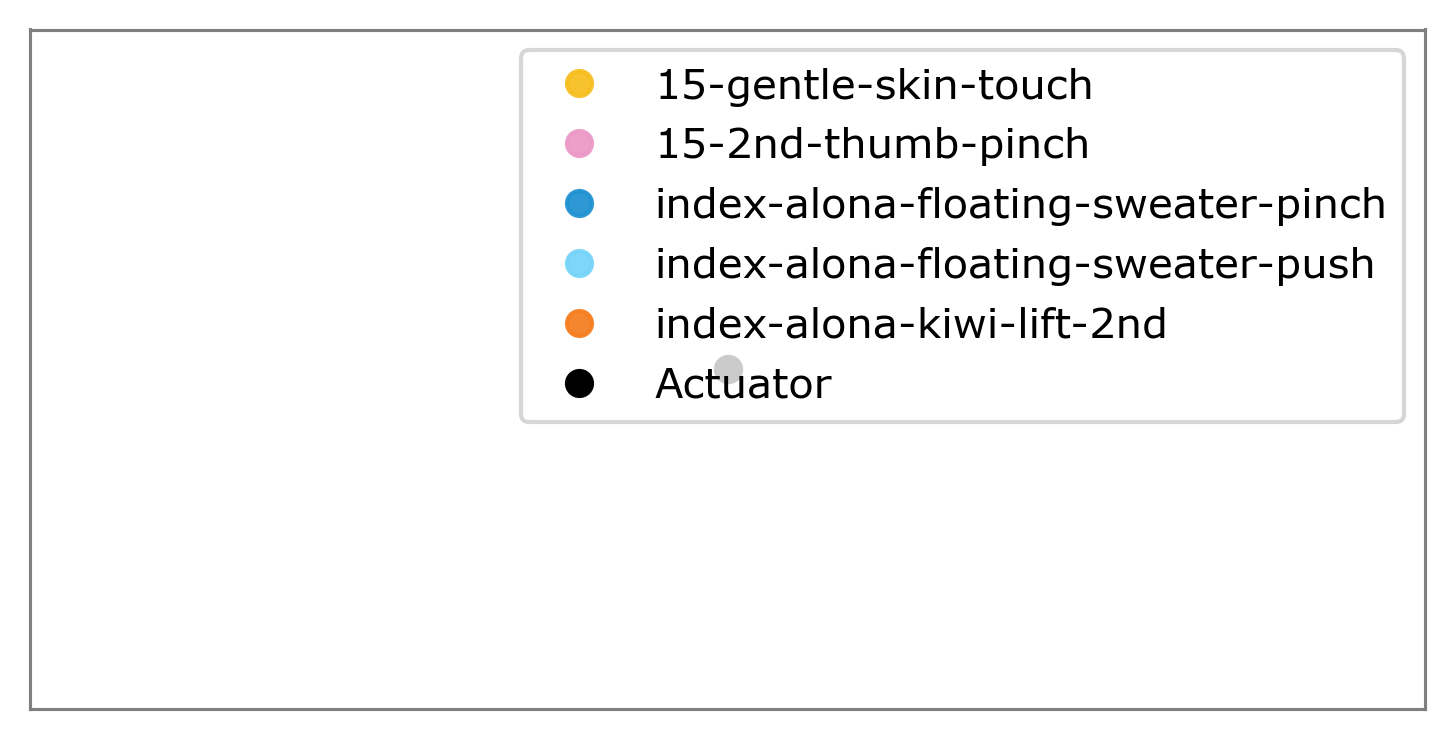

In [10]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def boxplot_2d(x,y, ax, whis=1.0, xWidth=0.04, yWidth=0.2, faceColor='c', lineColor='k'):
    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]
    
    print("x[25%% - Median - 75%%] %.2f, %.2f, %.2f\n" % (xlimits[0],xlimits[1],xlimits[2]))
    print("y[25%% - Median - 75%%] %.2f, %.2f, %.2f\n" % (ylimits[0],ylimits[1],ylimits[2]))
    
    box = Rectangle((xlimits[0],ylimits[0]),(xlimits[2]-xlimits[0]),(ylimits[2]-ylimits[0]),color=faceColor,ec = None,zorder=0)
    ax.add_patch(box)

    vline = Line2D([xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],color=lineColor,zorder=1)
    ax.add_line(vline)
    hline = Line2D([xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],color=lineColor,zorder=1)
    ax.add_line(hline)

    ##the central point
#     ax.plot([xlimits[1]],[ylimits[1]], color=faceColor, marker='o')

    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(x[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D([left, xlimits[0]], [ylimits[1],ylimits[1]],color=lineColor,zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D([left, left], [ylimits[1]-yWidth,ylimits[1]+yWidth],color=lineColor,zorder = 1)
    ax.add_line(whisker_bar)

    ##right
    right = np.max(x[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D([right, xlimits[2]], [ylimits[1],ylimits[1]],color=lineColor,zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D([right, right], [ylimits[1]-yWidth,ylimits[1]+yWidth],color=lineColor,zorder = 1)
    ax.add_line(whisker_bar)

    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]

    ##bottom
    bottom = np.min(y[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D([xlimits[1],xlimits[1]], [bottom, ylimits[0]], color=lineColor,zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D([xlimits[1]-xWidth,xlimits[1]+xWidth], [bottom, bottom], color=lineColor,zorder = 1)
    ax.add_line(whisker_bar)

    ##top
    top = np.max(y[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D([xlimits[1],xlimits[1]], [top, ylimits[2]], color=lineColor,zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D([xlimits[1]-xWidth,xlimits[1]+xWidth], [top, top], color=lineColor,zorder = 1)
    ax.add_line(whisker_bar)

    ##outliers
    mask = (x<left)|(x>right)|(y<bottom)|(y>top)
    ax.scatter(x[mask],y[mask],facecolors=faceColor, edgecolors=None)
    
measureDataPath = ".\Data0425"

gestureLabels = ['15-gentle-skin-touch','15-2nd-thumb-pinch','index-alona-floating-sweater-pinch', 
                 'index-alona-floating-sweater-push','index-alona-kiwi-lift-2nd',] #,'index-alona-tomato-lift' 'index-alona-keyboard'7500 'index-alona-palpation'
validStartInd = [0, 900, 300, 1300, 400, 400, 200]
thresholds = [0.6, 0.6, 0.6, 0.9, 1.1, 1.1] # index-alona-keyboard = 1.1

# colorSet1 = ['tab:purple', 'tab:orange', 'tab:blue', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:red', 'tab:green']
# colorSet2 = ['mediumpurple','orange','dodgerblue','sienna','pink','gold','cyan','red','mediumseagreen']

colorSet1 = ['#e69f00ff','#cc79a7ff','#0072b2ff','#56b4e9ff','#d55e00ff','#000000ff','#f0e442ff','#009e73ff'] # Colorblind-Friendly Diagrams
colorSet2 = ['#f6Bf20f0','#ec99c7f0','#2092d2f0','#76d4f9f0','#f57e20f0','#202020f0','#f0f462f0','#20be93f0']
# colorSet2 = ['#e69f00f0','#cc79a7f0','#0072b2f0','#56b4e9f0','#d55e00f0','#000000f0','#f0e442f0','#009e73f0']

gestureNum = len(gestureLabels)

yRange = [0, 12]
fig1, ax1 = plt.subplots(dpi=300, figsize=(6,6))

for i in range(gestureNum):
    fileName = ('%s.btd.csv' % gestureLabels[i]);
    btData = loadRawBioTac(measureDataPath, fileName)
    print(fileName)

    startInd, endInd = segmentData(btData, minInterval=50, threshold=thresholds[i], disp=False, title=fileName, validStartInd=validStartInd[i])

    peakPressure, trisePressure, tDuration = dataStats(btData, startInd, endInd, biotacFs['Pdc'])
    
    print("\n-------- %s --------" % gestureLabels[i])
    boxplot_2d(tDuration, peakPressure, ax=ax1, faceColor=colorSet2[i], lineColor=colorSet1[i])
    
markSize = 4
indCondi = (allData['ChargeTime_ms'] >= 200)
vLevels = [2, 4, 8, 16, 32, 64, 100]

for i in range(len(vLevels)):
    selectInd = (allData['Voltage'] == vLevels[i]) & indCondi
    ax1.scatter(getDataArray(allData, selectInd, 'TDuration', toFlat=True),
           getDataArray(allData, selectInd, 'PeakPdc', toFlat=True), s=markSize, c=actuatorColor)

ax1.set_xlabel('Duration (sec)')
ax1.set_ylabel('Peak Pressure (kPa)')
ax1.set_xlim([0, 2])
ax1.set_ylim([-0.2, 7.6])

ax1.spines['bottom'].set_color('k')
ax1.spines['right'].set_color('k') 
ax1.spines['left'].set_color('k')
ax1.spines['top'].set_color('k') 

fig2, ax2 = plt.subplots(dpi=300, figsize=(6,3)) # Colorlegend
for i in range(gestureNum):
    ax2.plot(0,0,'o', c=colorSet2[i], label=gestureLabels[i])
ax2.plot(0,0,'o', c=actuatorColor, label='Actuator')
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend()

fig1.savefig("NaturalTouch.pdf", bbox_inches='tight')
fig2.savefig("NaturalTouch_Colorbar.pdf", bbox_inches='tight')

[Text(0, 0, '15-gentle-skin-touch'),
 Text(1, 0, '15-2nd-thumb-pinch'),
 Text(2, 0, 'index-alona-floating-sweater-pinch'),
 Text(3, 0, 'index-alona-floating-sweater-push'),
 Text(4, 0, 'index-alona-kiwi-lift-2nd'),
 Text(5, 0, 'V64C1200'),
 Text(6, 0, 'V32C400')]

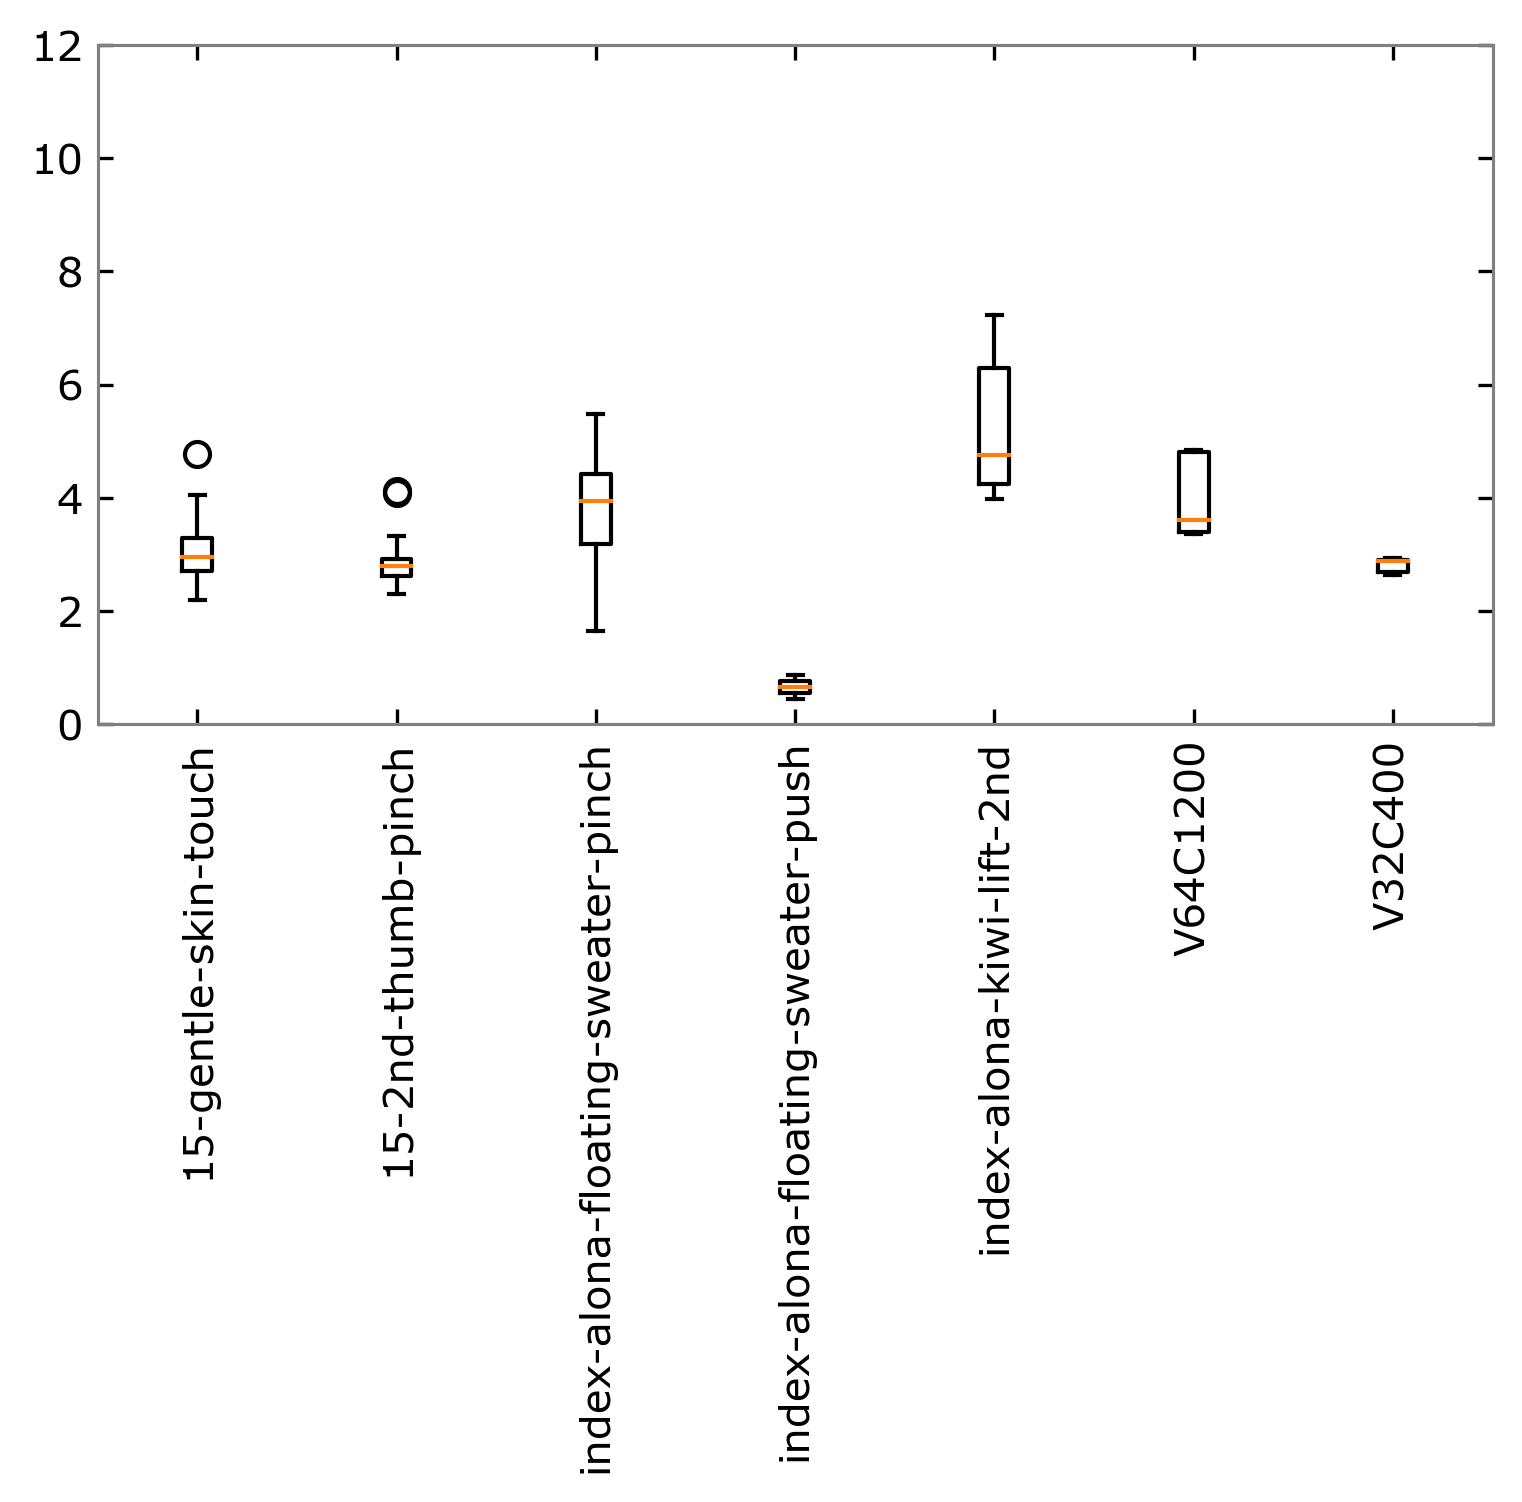

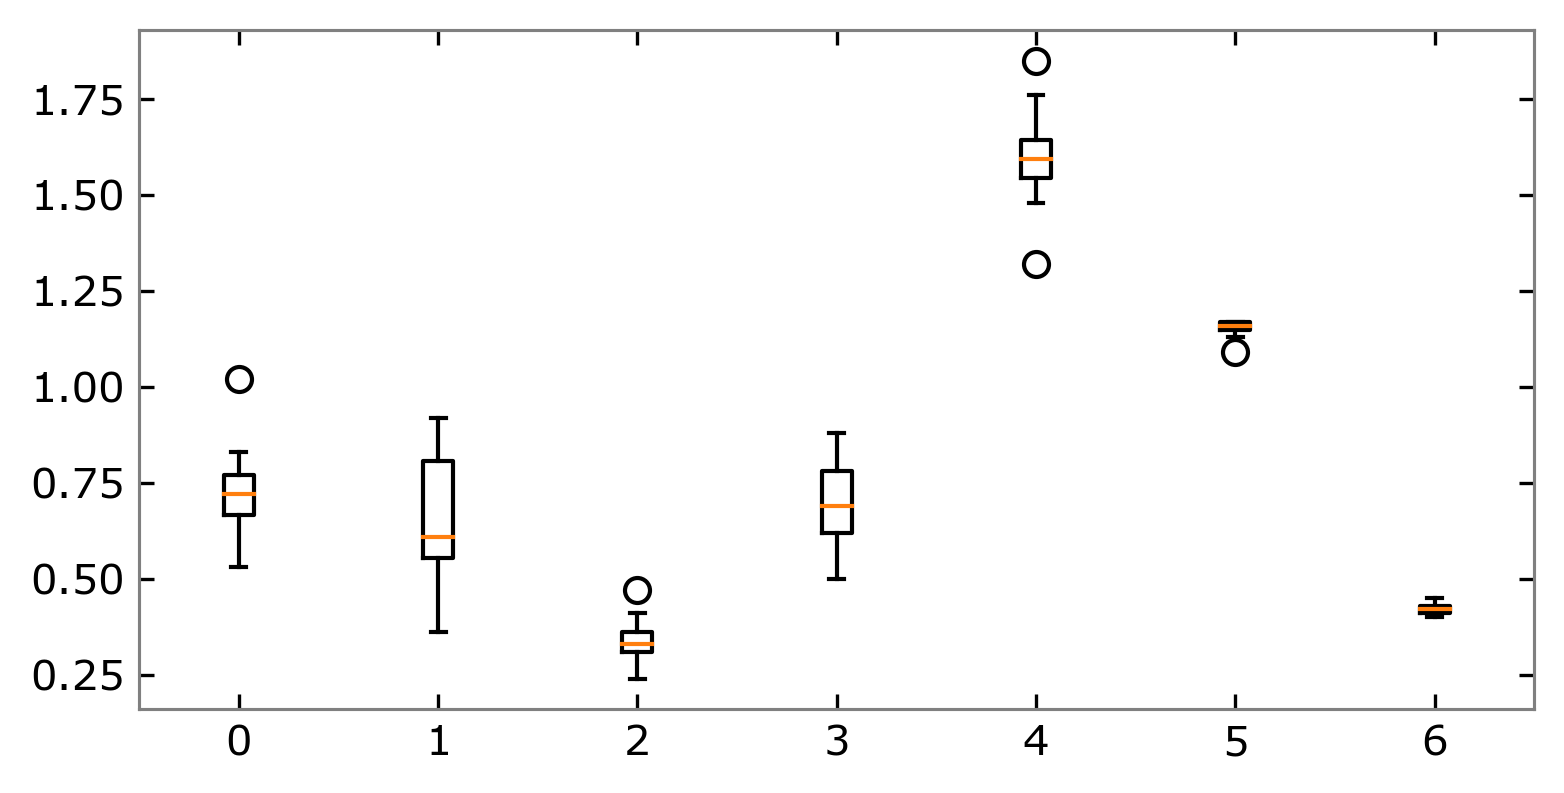

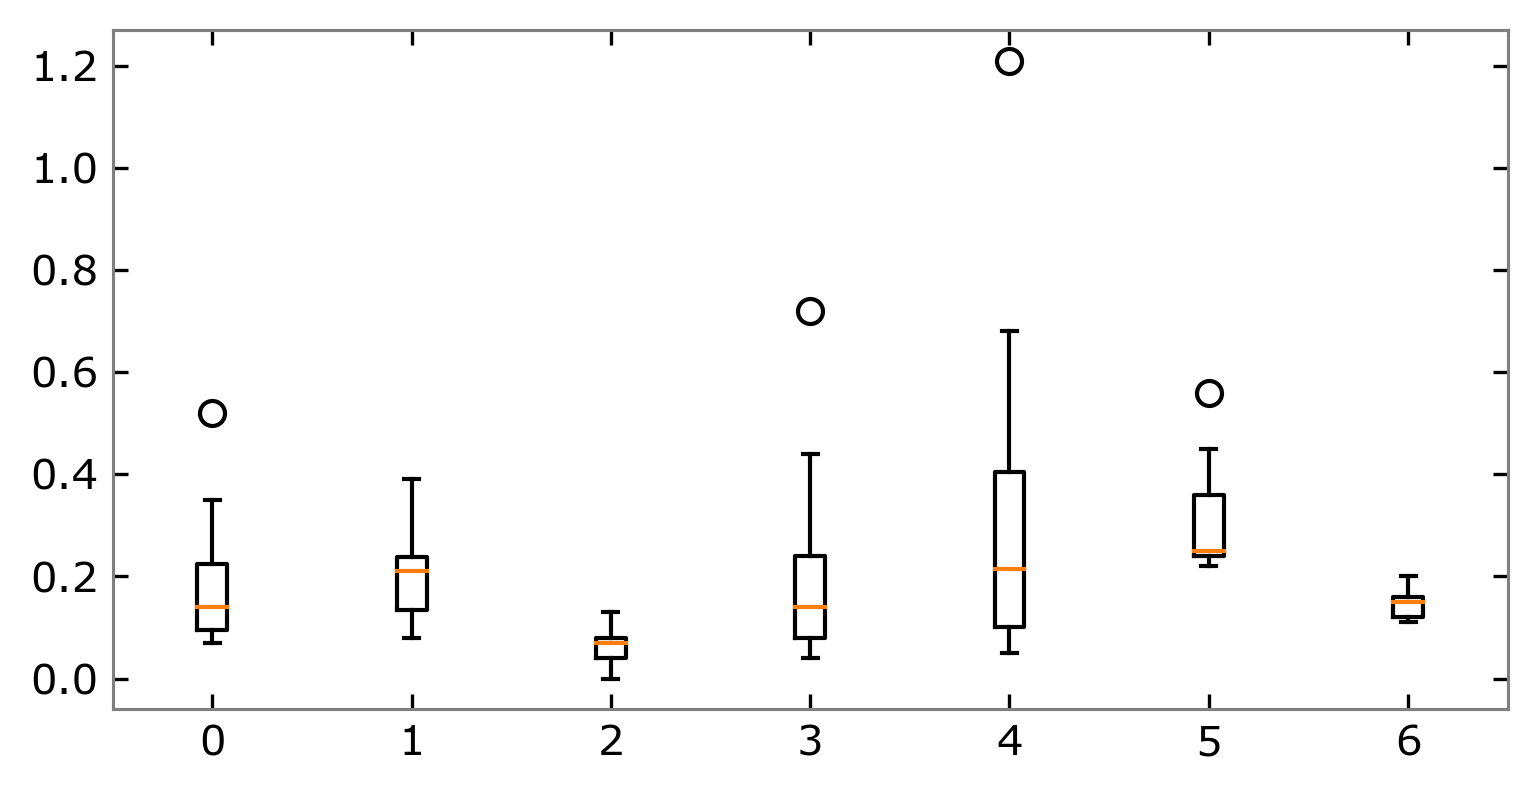

In [11]:
''' Data from natural touch interactions '''
measureDataPath = ".\Data0425"

# gestureLabels = ['index-alona-keyboard','index-alona-floating-sweater-pinch', 'index-alona-floating-sweater-push',
#                  'index-alona-kiwi-lift-2nd','index-alona-palpation','index-alona-tomato-lift'] # validStartInd = [7500, 300, 1300, 400, 400, 200]
gestureLabels = ['15-gentle-skin-touch','15-2nd-thumb-pinch','index-alona-floating-sweater-pinch', 
                 'index-alona-floating-sweater-push','index-alona-kiwi-lift-2nd',]
validStartInd = [0, 900, 300, 1300, 400, 400, 200]
thresholds = [0.6, 0.6, 0.6, 0.9, 1.1, 1.1]

gestureNum = len(gestureLabels)

yRange = [0, 12]
_, axV = plt.subplots(dpi=300, figsize=(6,3))
_, axH = plt.subplots(dpi=300, figsize=(6,3))
_, ax3 = plt.subplots(dpi=300, figsize=(6,3))

for i in range(gestureNum):
    fileName = ('%s.btd.csv' % gestureLabels[i]);
    btData = loadRawBioTac(measureDataPath, fileName)
    
    startInd, endInd = segmentData(btData, minInterval=50, threshold=thresholds[i], disp=False, title=fileName, validStartInd=validStartInd[i])

    peakPressure, trisePressure, tDuration = dataStats(btData, startInd, endInd, biotacFs['Pdc'])
    
    axV.boxplot(peakPressure, positions=[i])
    axH.boxplot(tDuration, positions=[i])
    ax3.boxplot(trisePressure, positions=[i])
    
axV.set_ylim(yRange)

# axV.set_xticklabels(gestureLabels, rotation=90) # axV.get_yaxis().set_visible(False)

''' Evaluation and visualization with designated features '''
vLevels = [2, 4, 8, 16, 32]
vlevelKv = [2.9874,3.6049875,4.69175,6.26205,7.152525]
cTime = [100, 200, 400, 800, 1200, 1600]

selectInd = (allData['Voltage'] == 64) & (allData['ChargeTime_ms'] == 1200)
axV.boxplot(getDataArray(allData, selectInd, 'PeakPdc', toFlat=True), positions=[gestureNum])
axH.boxplot(getDataArray(allData, selectInd, 'TDuration', toFlat=True), positions=[gestureNum])
ax3.boxplot(getDataArray(allData, selectInd, 'TrisePdc', toFlat=True), positions=[gestureNum])
gestureLabels.append("V64C1200")

selectInd = (allData['Voltage'] == 32) & (allData['ChargeTime_ms'] == 400)
axV.boxplot(getDataArray(allData, selectInd, 'PeakPdc', toFlat=True), positions=[gestureNum+1])
axH.boxplot(getDataArray(allData, selectInd, 'TDuration', toFlat=True), positions=[gestureNum+1])
ax3.boxplot(getDataArray(allData, selectInd, 'TrisePdc', toFlat=True), positions=[gestureNum+1])
gestureLabels.append("V32C400")

axV.set_xticklabels(gestureLabels, rotation=90) 


(1.0, 4.0)

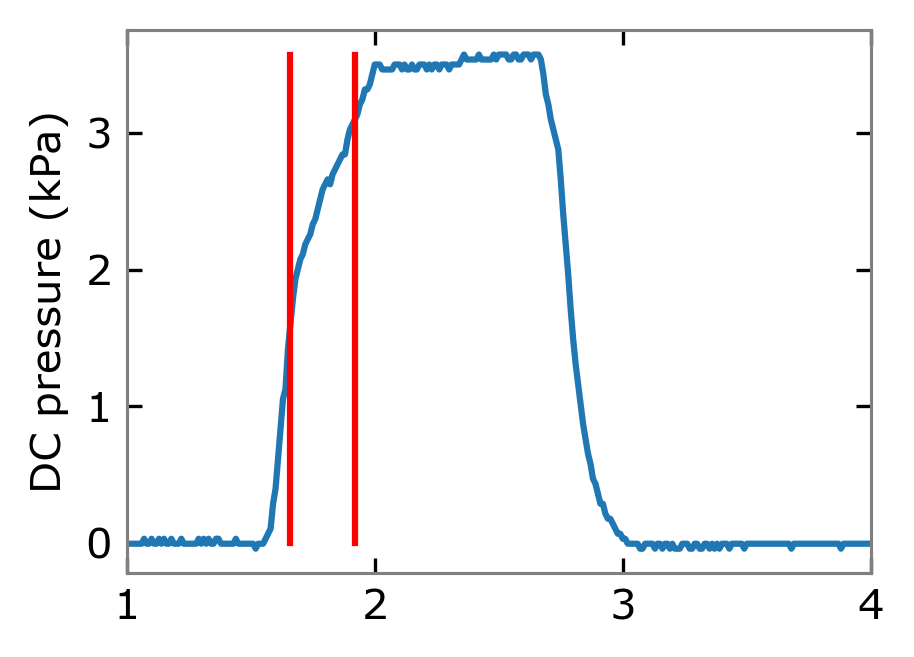

In [12]:
''' Display example signal to indicate peak, rist time '''    
exampleCase = ['L110F1.8V032C1200D4000', 11] # (Label, trial number)
ind = (allData['Label']==exampleCase[0])
exampleData = allData.loc[ind, 'Pdc'].values[0][exampleCase[1]]
exampleMark = allData.loc[ind, 'RiseMark'].values[0][exampleCase[1]]

maxValue = max(exampleData[:,1])

fig1, ax1 = plt.subplots(dpi=300, figsize=figSize_inch)
t = exampleData[:,0] - exampleData[0,0]
ax1.plot(t, exampleData[:,1])
ax1.plot([t[exampleMark[0]], t[exampleMark[0]]], [0, maxValue], '-r')
ax1.plot([t[exampleMark[1]], t[exampleMark[1]]], [0, maxValue], '-r')
ax1.set_ylabel("DC pressure (kPa)")
ax1.set_xlim([1, 4])

# fig1.savefig("exampleSignal.pdf", bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\yitia\AppData\Local\Temp\ipykernel_20000\2897735388.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xLabelStr, rotation=0);
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_m

<AxesSubplot:xlabel='Charge Time (sec)', ylabel='Rise time (sec)'>

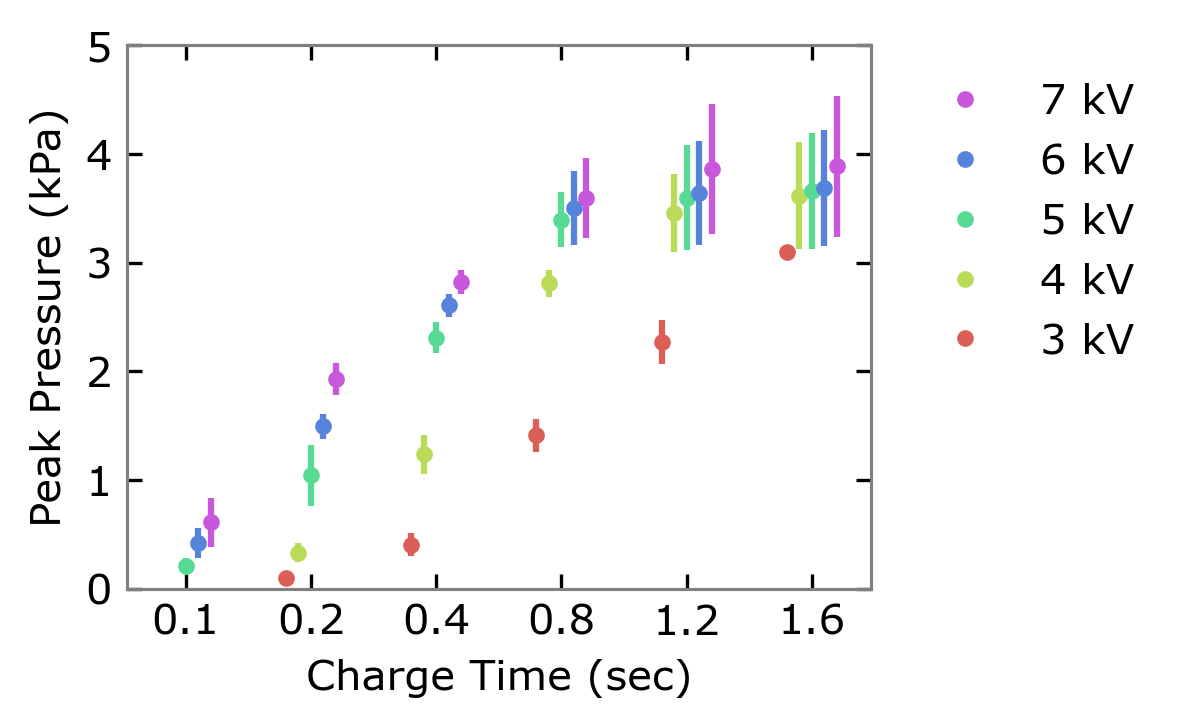

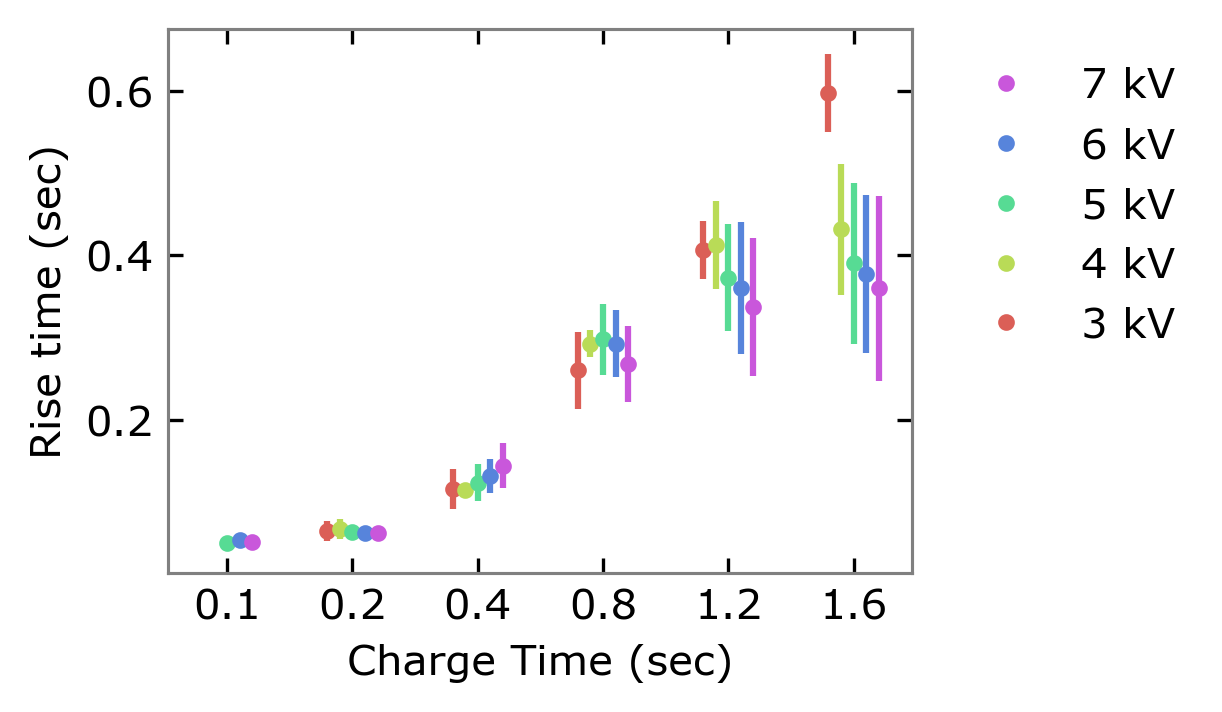

In [13]:
''' Evaluation and visualization with designated features '''
vLevels = [2, 4, 8, 16, 32]
vlevelKv = [2.9874,3.6049875,4.69175,6.26205,7.152525]
cTime = [100, 200, 400, 800, 1200, 1600]

colorSet = 'hls' #'tab10' # 'Set2'

x = np.arange(len(cTime))
xLabelStr = np.array(cTime) / 1000
yLabelStr = ["%.0f kV" % y for y in vlevelKv]
xLabel = 'Charge Time (sec)'

meanPeakPdc, stdPeakPdc = computeErrorbar(allData, 'Voltage', vLevels, 'ChargeTime_ms', cTime, 'PeakPdc')   
meanAvgPdc, stdAvgPdc = computeErrorbar(allData, 'Voltage', vLevels, 'ChargeTime_ms', cTime, 'AvgPdc')    
meanTrisePdc, stdTrisePdc = computeErrorbar(allData, 'Voltage', vLevels, 'ChargeTime_ms', cTime, 'TrisePdc')

meanPeakPdc[:2, 0] = np.NaN
meanAvgPdc[:2, 0] = np.NaN
meanTrisePdc[:2, 0] = np.NaN
stdPeakPdc[:2, 0] = np.NaN
stdAvgPdc[:2, 0] = np.NaN
stdTrisePdc[:2, 0] = np.NaN

fig1, ax1 = plt.subplots(dpi=300, figsize=figSize_inch)
dispErrorbar(ax1, x, meanPeakPdc, stdPeakPdc, xLabel, xLabelStr, yLabelStr, 'Peak Pressure (kPa)', colorSet, style='.',
            xShift=[0.2,0.4])
ax1.set_ylim([0, 5])

fig3, ax3 = plt.subplots(dpi=300, figsize=figSize_inch)
dispErrorbar(ax3, x, meanTrisePdc, stdTrisePdc, xLabel, xLabelStr, yLabelStr, 'Rise time (sec)', colorSet, style='.',
            xShift=[0.2,0.4])

# fig1.savefig("mixData_Peak.pdf", bbox_inches='tight')
# fig3.savefig("mixData_Trise.pdf", bbox_inches='tight')

In [ ]:
# measureDataPath = ".\Data2023.03.20"
# root = ""; 

# '''---------------------------------------------------- Keyboard ----------------------------------------------------'''
# fileName = 'keyboard.btd.csv' 
# btData = loadDataSegment(measureDataPath, root, fileName, lpFreq=0)

# examData(btData, tInstance=0, tRange=[4.7, 7.1])

# tind = np.arange(480, 510, 3)
# # tind = np.arange(470, 710, 20)
# fig1, fig1cbar, fig2, ax1 = generateMapResult(tind, btData, yMax=5.5)

# measureDataPath = ".\Data2023.03.20"
# root = ""; 

# '''---------------------------------------------------- Palpation ----------------------------------------------------'''
# fileName = 'palpation.btd.csv' 
# btData = loadDataSegment(measureDataPath, root, fileName, lpFreq=0)

# examData(btData, tInstance=0, tRange=[4.6, 7.6])

# tind = np.arange(460, 760, 15)
# fig1, fig1cbar, fig2, ax1 = generateMapResult(tind, btData, yMax=9)

# measureDataPath = ".\Data2023.03.20"
# root = ""; 

# '''---------------------------------------------------- Fabric ----------------------------------------------------'''
# fileName = 'fabric.btd.csv' 
# btData = loadDataSegment(measureDataPath, root, fileName, lpFreq=0)

# examData(btData, tInstance=0, tRange=[4.15, 4.95])

# # tind = np.arange(400, 600, 20)
# tind = np.arange(415, 496, 8)
# fig1, fig1cbar, fig2, ax1 = generateMapResult(tind, btData, yMax=6)
# # ax1.set_yticks([0, 3, 6]);

'''---------------------------------------------------- 1.2 sec ----------------------------------------------------'''
# ''' To plot all waveforms in one axis '''
# Act60v100c1200 = {}
# Act60v100c1200['t'] = btData['t']
# Act60v100c1200['pDC'] = btData['pDC']
# Act60v100c1200['tind'] = np.arange(687, 860, 20)

# fileName = 'v100c1200d4000t1.btd.csv' 
# btData = loadDataSegment(measureDataPath, root, fileName, lpFreq=0)

# btData['t'] = btData['t'] - 6.87999

# fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(Act60v100c1200['tind'], btData, 0, unifyRange="Symmetric");
'''---------------------------------------------------- 0.1 sec ----------------------------------------------------'''
# ''' To plot all waveforms in one axis '''
# Act60v100c100 = {}
# Act60v100c100['t'] = btData['t']
# Act60v100c100['pDC'] = btData['pDC']
# Act60v100c100['tind'] = np.arange(124, 151, 3)

# fileName = 'v100c100d4000t1.btd.csv' 
# btData = loadDataSegment(measureDataPath, root, fileName, lpFreq=0)

# btData['t'] = btData['t'] - 1.24999

# fig1,fig1cbar,fig2,ax2 = plotElectrodeRawData(Act60v100c100['tind'], btData, 0, unifyRange="Symmetric");

''' To plot all waveforms in one axis for Act60v100c1200, Act60v100c400, Act60v100c100'''
# def plotPressureSignal(dictin, ax, tindMargin=50, tShfit=0, yMax=5):
#     indRange = [dictin['tind'][0]-tindMargin, dictin['tind'][-1]+tindMargin]
#     ydata = dictin['pDC'][indRange[0]:indRange[1]]
#     ydata = ydata - ydata[0]
 
#     frameNum = len(dictin['tind'])
#     for i in range(frameNum):
#         ax.plot(dictin['t'][[dictin['tind'][i], dictin['tind'][i]]] + tShfit, [0, yMax], 'tab:grey', lw=0.5)
        
#     ax.plot(dictin['t'][indRange[0]:indRange[1]] + tShfit, ydata) 
#     ax.set_ylim([-0.1, yMax])

# def plotCtrlSignal(ax, tOn=100, tMargin=200, tShift=0):
#     segLen = 1600
#     y = np.zeros((segLen,1))
#     y[tMargin:tMargin+tOn] = 1
#     x = np.arange(segLen)
#     ax.plot((x + tShift - tMargin)/1000, y, 'tab:grey')
    
# fig0, axes = plt.subplots(2, 1, dpi=300, figsize=(3.2, 0.6))
# plotPressureSignal(Act60v100c400, axes[0], tindMargin=0)
# plotPressureSignal(Act60v100c1200, axes[0], tindMargin=0, tShfit=2)
# # axes[0].set_xlim([-0.2, 5.8])

# plotCtrlSignal(axes[1], tOn=100, tShift=0)
# plotCtrlSignal(axes[1], tOn=400, tShift=1600)
# plotCtrlSignal(axes[1], tOn=1200, tShift=3600)
# # axes[1].set_xlim([-0.2, 5.8])